<table align="left"><tr><td>
<a href="https://colab.research.google.com/github/rickiepark/nlp-with-transformers/blob/main/01_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="코랩에서 실행하기"/></a>
</td></tr></table>

In [1]:
# 코랩을 사용하지 않으면 이 셀의 코드를 주석 처리하세요.
!git clone https://github.com/rickiepark/nlp-with-transformers.git
%cd nlp-with-transformers
from install import *
install_requirements(chapter=1)

Cloning into 'nlp-with-transformers'...
remote: Enumerating objects: 538, done.
remote: Counting objects: 100% (272/272), done.
remote: Compressing objects: 100% (165/165), done.
remote: Total 538 (delta 165), reused 184 (delta 107), pack-reused 266
Receiving objects: 100% (538/538), 46.22 MiB | 11.88 MiB/s, done.
Resolving deltas: 100% (264/264), done.
Updating files: 100% (118/118), done.
/content/nlp-with-transformers
⏳ Installing base requirements ...
✅ Base requirements installed!
Using transformers v4.26.1
Using datasets v2.10.1
Using accelerate v0.16.0
Using sentencepiece v0.1.97
Using sacremoses v0.0.41


# 트랜스포머스 소개

<img alt="transformer-timeline" caption="The transformers timeline" src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter01_timeline.png?raw=1" id="transformer-timeline"/>

## 인코더-디코더 프레임워크

<img alt="rnn" caption="Unrolling an RNN in time." src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter01_rnn.png?raw=1" id="rnn"/>

<img alt="enc-dec" caption="Encoder-decoder architecture with a pair of RNNs. In general, there are many more recurrent layers than those shown." src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter01_enc-dec.png?raw=1" id="enc-dec"/>

## 어텐션 메커니즘

<img alt="enc-dec-attn" caption="Encoder-decoder architecture with an attention mechanism for a pair of RNNs." src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter01_enc-dec-attn.png?raw=1" id="enc-dec-attn"/> 

<img alt="attention-alignment" width="500" caption="RNN encoder-decoder alignment of words in English and the generated translation in French (courtesy of Dzmitry Bahdanau)." src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter02_attention-alignment.png?raw=1" id="attention-alignment"/> 

<img alt="transformer-self-attn" caption="Encoder-decoder architecture of the original Transformer." src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter01_self-attention.png?raw=1" id="transformer-self-attn"/> 

## NLP의 전이 학습

<img alt="transfer-learning" caption="Comparison of traditional supervised learning (left) and transfer learning (right)." src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter01_transfer-learning.png?raw=1" id="transfer-learning"/>  

<img alt="ulmfit" width="500" caption="The ULMFiT process (courtesy of Jeremy Howard)." src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter01_ulmfit.png?raw=1" id="ulmfit"/>

# 파이프라인이란?
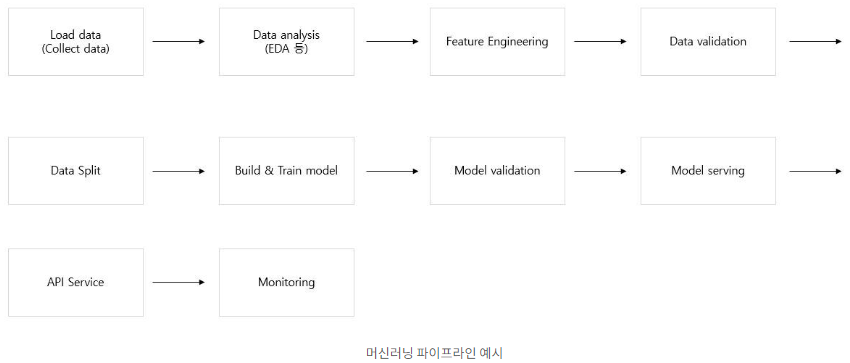

*   하나의 머신러닝과 딥러닝 프로젝트를 진행할 때 위의 사진에서 볼 수 있는 것과 같은 다양한 과정들이 존재하고, 이러한 일련의 과정을 모두 관리해야 하는데, 이러한 과정을 **pipeline**이라고 한다.
*   이러한 일련의 과정을 최대한 쉽게 관리하고, 자동화 할 수 있는 것이 매우 중요



## 허깅 페이스 트랜스포머스



## 트랜스포머 애플리케이션 둘러보기

In [ ]:
text = """Dear Amazon, last week I ordered an Optimus Prime action figure \
from your online store in Germany. Unfortunately, when I opened the package, \
I discovered to my horror that I had been sent an action figure of Megatron \
instead! As a lifelong enemy of the Decepticons, I hope you can understand my \
dilemma. To resolve the issue, I demand an exchange of Megatron for the \
Optimus Prime figure I ordered. Enclosed are copies of my records concerning \
this purchase. I expect to hear from you soon. Sincerely, Bumblebee."""

### 텍스트 분류

In [ ]:
# 다음 코드를 실행하면 파이프라인이 자동으로 허깅페이스 허브(Hugging Face Hub)에서 모델 가중치를 다운로드 진행
from transformers import pipeline

classifier = pipeline("text-classification")

In [ ]:
import pandas as pd

outputs = classifier(text)
pd.DataFrame(outputs)    

,label,score
0,NEGATIVE,0.901546


### 개체명 인식

In [ ]:
# aggregation_strategy parameter = "simple" : 예측 과정에서 객체를 group화 시키는 역할 수행
ner_tagger = pipeline("ner", aggregation_strategy="simple")
outputs = ner_tagger(text)
pd.DataFrame(outputs)    

,entity_group,score,word,start,end
0,ORG,0.879011,Amazon,5,11
1,MISC,0.990859,Optimus Prime,36,49
2,LOC,0.999755,Germany,90,97
3,MISC,0.556571,Mega,208,212
4,PER,0.590256,##tron,212,216
5,ORG,0.669692,Decept,253,259
6,MISC,0.498349,##icons,259,264
7,MISC,0.775362,Megatron,350,358
8,MISC,0.987854,Optimus Prime,367,380
9,PER,0.812096,Bumblebee,502,511


### 질문 답변

In [ ]:
reader = pipeline("question-answering")
question = "What does the customer want?"
outputs = reader(question=question, context=text)
pd.DataFrame([outputs])    
# 이 예시의 경우 답변을 text에서 직접 추출하기 때문에 start, end index를 함께 반환해준다.

,score,start,end,answer
0,0.631292,335,358,an exchange of Megatron


### 요약

In [ ]:
summarizer = pipeline("summarization")
outputs = summarizer(text, max_length=60, clean_up_tokenization_spaces=False)
outputs_ = summarizer(text, max_length=60, clean_up_tokenization_spaces=True)
# 두 가지 parameters를 이용하여 출력을 조정
# "clean_up_tokenization_spaces=False" : 마지막 문장 끝 온점 전 space 존재
print(outputs[0]['summary_text'])
print("-"*20)
print(outputs_[0]['summary_text'])

 Bumblebee ordered an Optimus Prime action figure from your online store in
Germany . Unfortunately, when I opened the package, I discovered to my horror
that I had been sent an action figure of Megatron instead . As a lifelong enemy
of the Decepticons, I hope you can understand
--------------------
 Bumblebee ordered an Optimus Prime action figure from your online store in
Germany. Unfortunately, when I opened the package, I discovered to my horror
that I had been sent an action figure of Megatron instead. As a lifelong enemy
of the Decepticons, I hope you can understand


In [ ]:
outputs

[{'summary_text': ' Bumblebee ordered an Optimus Prime action figure from your online store in Germany . Unfortunately, when I opened the package, I discovered to my horror that I had been sent an action figure of Megatron instead . As a lifelong enemy of the Decepticons, I hope you can understand'}]

### 번역

In [ ]:
# "translation_en_to_de" : English-to-German translation
translator = pipeline("translation_en_to_de", 
                      model="Helsinki-NLP/opus-mt-en-de")
outputs = translator(text, clean_up_tokenization_spaces=True, min_length=100)
print(outputs[0]['translation_text'])

Sehr geehrter Amazon, letzte Woche habe ich eine Optimus Prime Action Figur aus
Ihrem Online-Shop in Deutschland bestellt. Leider, als ich das Paket öffnete,
entdeckte ich zu meinem Entsetzen, dass ich stattdessen eine Action Figur von
Megatron geschickt worden war! Als lebenslanger Feind der Decepticons, Ich
hoffe, Sie können mein Dilemma verstehen. Um das Problem zu lösen, Ich fordere
einen Austausch von Megatron für die Optimus Prime Figur habe ich bestellt.
Anbei sind Kopien meiner Aufzeichnungen über diesen Kauf. Ich erwarte, bald von
Ihnen zu hören. Aufrichtig, Bumblebee.


### 텍스트 생성

In [ ]:
from transformers import set_seed
set_seed(42) # 동일 결과를 재현하기 위해 지정

In [ ]:
generator = pipeline("text-generation")
response = "Dear Bumblebee, I am sorry to hear that your order was mixed up."
prompt = text + "\n\nCustomer service response:\n" +response
outputs = generator(prompt, max_length=200)
print(outputs)
print("-"*80)
print(outputs[0]['generated_text'])

[{'generated_text': 'Dear Amazon, last week I ordered an Optimus Prime action
figure from your online store in Germany. Unfortunately, when I opened the
package, I discovered to my horror that I had been sent an action figure of
Megatron instead! As a lifelong enemy of the Decepticons, I hope you can
understand my dilemma. To resolve the issue, I demand an exchange of Megatron
for the Optimus Prime figure I ordered. Enclosed are copies of my records
concerning this purchase. I expect to hear from you soon. Sincerely,
Bumblebee.\n\nCustomer service response:\nDear Bumblebee, I am sorry to hear
that your order was mixed up. Your question was clearly a bad one. Please take
my email and try again to get an answer in writing. I hope to hear from you soon
on the issue. Thank you in advance for your service.\n\nProduct packaging and
shipping:\n\nDear Bumblebee, The Prime has been shipped and delivered to your
home with a'}]
---------------------------------------------------------------------

## 허깅 페이스 생태계

<img alt="ecosystem" width="500" caption="An overview of the Hugging Face ecosystem of libraries and the Hub." src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter01_hf-ecosystem.png?raw=1" id="ecosystem"/>

*   허깅페이스 생태계는 크게 라이브러리와 허브로 구성
  1. 라이브러리 : 코드 제공
  2. 허브 : 사전 훈련된 모델 가중치, 데이터셋, 평가 지표를 위한 스크립트 등을 제공 




### 허깅 페이스 허브

<img alt="hub-overview" width="1000" caption="The models page of the Hugging Face Hub, showing filters on the left and a list of models on the right." src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter01_hub-overview.png?raw=1" id="hub-overview"/> 

<img alt="hub-model-card" width="1000" caption="A example model card from the Hugging Face Hub. The inference widget is shown on the right, where you can interact with the model." src="https://github.com/rickiepark/nlp-with-transformers/blob/main/images/chapter01_hub-model-card.png?raw=1" id="hub-model-card"/> 

### 허깅 페이스 토크나이저


*   토크나이저 또한 사전 훈련된 모델 가중치를 로드하는 방식으로 토크나이저를 로드할 수 있다.



### 허깅 페이스 데이터셋


*   허깅 페이스의 데이터셋은 기존의 데이터셋을 로드, 처리, 저장하는 일련의 과정을 허브에서 찾을 수 있는 **수천 개의 데이터셋에 대한 표준 인터페이스를 제공**해 과정을 단순화 시켜준다.
*   **메모리 매핑(memory mapping)**이라는 특별한 메커니즘을 활용해 햄 부족을 피할 수 있는데, 메모리 매핑이란 파일 내용을 가상 메모리에 정하고 여러 개의 프로세스로 더 효율적으로 파일을 수정한다. 



### 허깅 페이스 액셀러레이트